# Regressão linear com Gradiente Descendente


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Definição da função objetivo

A função objetivo é definida como:

### $f(x)= \sum_{i=1}^{n} \frac{(ax + b - y_i)^{2}}{n}$

In [2]:
def fobj (Y, X, a, b):
    
    z= 1.0/(2 * len(X))
    f= []
    
    for i in range(0, len(X)):
    
        f.append(z * ((((a * X[i]) + b - Y[i])**2)))
        
    f = sum(f)
    
    return f

#### 2. Definição da derivada da função objetivo
As derivadas da função objetivo são feitas em relação aos parâmetros que desejamos estimar (a,b). Estas derivadas são responsáveis pelo incremento durante o processo iterativo de atualização dos parâmetros. Estas derivadas são dadas por:

### $\frac{\partial f(x)}{\partial  a}= 2\times{\sum_{i=1}^{n} \frac{(ax + b - y_i)x}{n}}$
### $\frac{\partial f(x)}{\partial  b}= 2\times{\sum_{i=1}^{n} \frac{(ax + b - y_i)}{n}}$

In [3]:
def Df (Y, X, a, b):
    
    da, db = [], []
    for i in range(0, len(X)):
        
        da.append((((-Y[i] + (a * X[i]) + b) * X[i]))/len(X))
        db.append(((-Y[i] + (a * X[i]) + b))/len(X)) 
        
    da = sum(da)
    db = sum(db)
    
    return da, db

#### 3. Atualização dos parâmetros da equação

No processo de iteração, há a necessidade de utilizar um passo de atualização para obter um melhor controle em cada iteração. Esse termo é o $ \lambda$ das equações abaixo:

### $a_{i+1}= a_{i} -\lambda \times{\frac{\partial f(x)}{\partial  a}}$
### $b_{i+1}= b_{i} -\lambda \times{\frac{\partial f(x)}{\partial  b}}$



In [4]:
def RegressaoLinear(Y, X, num_iterations = 100, learning_rate = 0.002, a = 0.5, b = 0.1):
    
    custo= []
    
    for i in range(num_iterations):
        
       
        w = np.array([a, b]).reshape(2,)
        da, db= Df(Y, X, a, b)
        grad= np.array([da, db]).reshape(2,)
        w = w -(learning_rate * grad)
        a= w[0]
        b= w[1]
        custo.append(fobj(Y, X, a, b))
        
    return a, b, custo    

#### 4. Predição do modelo

Uma vez que o modelo foi treinado, a partir de um conjunto de dados de treino, os parâmetros estimados (a,b) são usados para a construção do modelo linear $ f(x)= ax + b$ e com isso a função pode ser utilizada para realizar predições com um novo conjunto de dados (dados de teste)

In [5]:
def predict (X, a, b):
    
    y = a * X + b
    
    return y

#### 5. Aplicando o modelo de regressão linear para um dado conjunto de treino

In [6]:
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
Y = np.array([25, 170, 380, 550, 610, 800, 930, 1250, 1190])


#### 6. Treinando o modelo de regressão

In [7]:
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)
a, b, custo = RegressaoLinear(Y, X, num_iterations= 3000, learning_rate= 0.0001, a= 1.0, b= 2.0)

#### 7. Visualização gráfica da reta de regressão

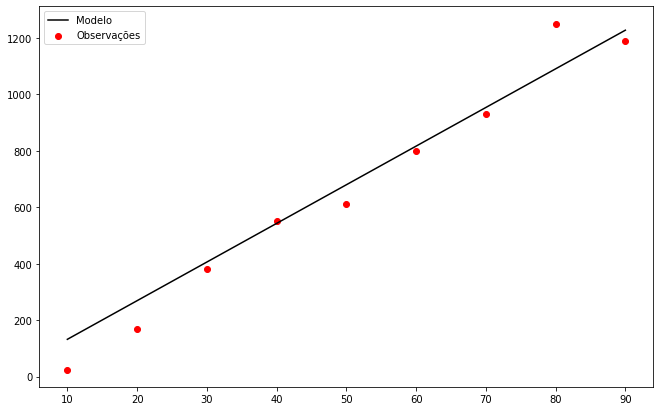

In [8]:
y_pred = predict(X, a, b)

fig, axe = plt.subplots(1, 1, figsize = (11,7))
axe.scatter(X, Y, color = 'red', label = 'Observações')
axe.plot(X, y_pred, color = 'black', label = 'Modelo')
axe.legend(loc= 'best')